In [1]:
from DataSyncer import Data

sample_rate = 22050
data = Data(
    id="RX0",
    sensor_log_path="dataset/data/chaos-bells-3/raw/RX0-data.log",
    num_sensors=2,
    sample_rate=sample_rate
)

Loading "dataset/data/chaos-bells-3/raw/RX0-data.log"...


Text(0.5, 1.0, 'RX0 Sensor Data')

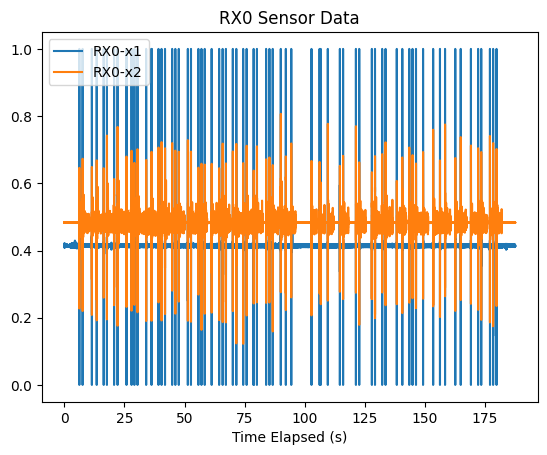

In [2]:
ax = data.plotSensor()
ax.set_title("RX0 Sensor Data")

Text(0.5, 1.0, 'RX0 Sensor Data')

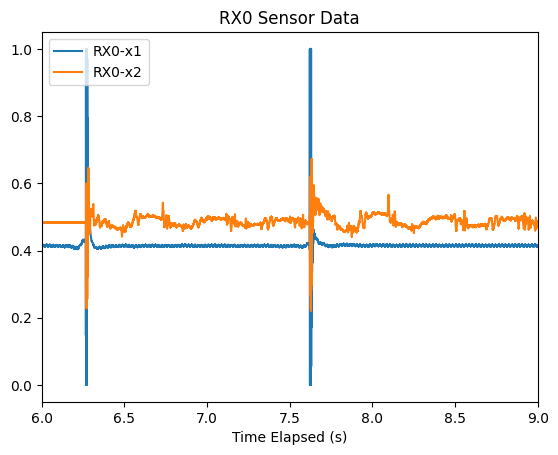

In [3]:
ax = data.plotSensor()
ax.set_xlim(6,9)
ax.set_title("RX0 Sensor Data")

In [5]:
## processed version
from DataSyncer import SyncedDataLoader
from dataset.dataset import ForecastingTorchDataset

sensor_data = SyncedDataLoader(
    path="dataset/data/chaos-bells-3/processed/RX0", id="RX0", num_sensors=2)

seq_len = 512
sample_rate=22050
n_tgt_windows = 3
dataset = ForecastingTorchDataset(sensor_data, seq_len,n_tgt_windows)
print("window length = {}".format(round(seq_len/sample_rate,2)))

window length = 0.02


In [6]:
dataset.inputs.shape, dataset.targets.shape

((8073, 512, 2), (8073, 1536, 2))

Text(0.5, 0.98, 'RX0 hits (>0.6) random sample. sensor_idx=1, win-size = 512 @ 22050 Hz')

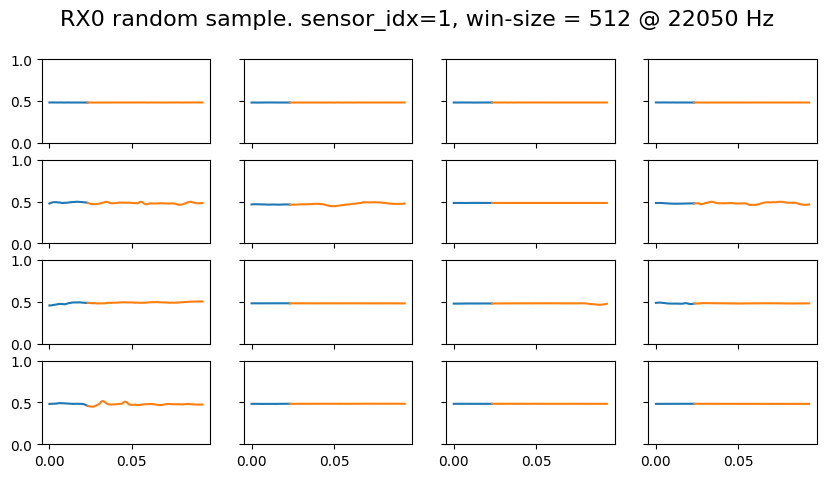

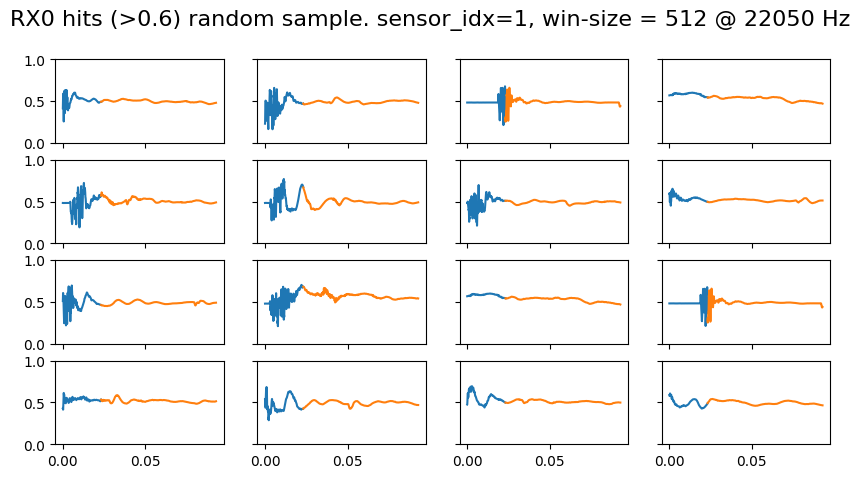

In [9]:
import matplotlib.pyplot  as plt
import numpy as np
import itertools
# framesElapsed is now the index of each row
framesElapsedInput = np.arange(seq_len)
framesElapsedTarget = np.arange(seq_len*n_tgt_windows)

timeElapsedInput = [e / sample_rate for e in framesElapsedInput] 
timeElapsedTarget = [e / sample_rate for e in framesElapsedTarget] 
x_label = "Time Elapsed (s)"

#----#
    
# random samples from the dataset
fig1, ax1 = plt.subplots(4,4, sharex='col', sharey='row', figsize=(10,5))
    
sensor_idx = 1 # accelerometer
for  i,j in itertools.product(np.arange(4), repeat=2):
    item = np.random.choice(dataset.inputs.shape[0])
    ax1[i,j].plot(timeElapsedInput,dataset.inputs[item,:,sensor_idx])
    ax1[i,j].plot(timeElapsedInput[-1]+timeElapsedTarget,dataset.targets[item,:,sensor_idx])
    ax1[i,j].set_ylim(0,1)
    

fig1.suptitle("RX0 random sample. sensor_idx={}, win-size = {} @ {} Hz".format(sensor_idx,seq_len, sample_rate), fontsize=16)

#----#

# random samples with hits
fig2, ax2 = plt.subplots(4,4, sharex='col',sharey='row', figsize=(10,5))

sensor_idx = 1 # accelerometer
windows_with_hits = list(set([e[0] for e in np.argwhere(dataset.inputs[:,:,sensor_idx] > 0.6)]))
for  i,j in itertools.product(np.arange(4), repeat=2):
    item = np.random.choice(windows_with_hits)
    ax2[i,j].plot(timeElapsedInput,dataset.inputs[item,:,sensor_idx])
    ax2[i,j].plot(timeElapsedInput[-1]+timeElapsedTarget,dataset.targets[item,:,sensor_idx])
    ax2[i,j].set_ylim(0,1)
    

fig2.suptitle("RX0 hits (>0.6) random sample. sensor_idx={}, win-size = {} @ {} Hz".format(sensor_idx,seq_len, sample_rate), fontsize=16)

        